In [353]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imutils
import os
import random

(59, 125, 3)

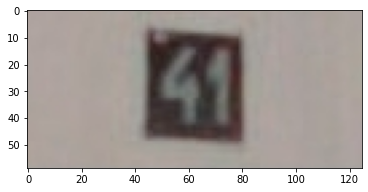

In [354]:
i=random.randint(0,33402)
img = cv2.imread(f'train/train/{i}.png')
plt.imshow(img)
img.shape

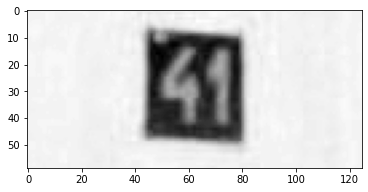

In [355]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

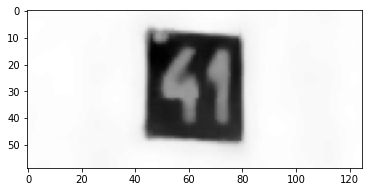

In [356]:
bfilter=cv2.bilateralFilter(gray,11,17,17) #Better than gaussian because it keeps edges sharp
plt.imshow(bfilter,cmap='gray')

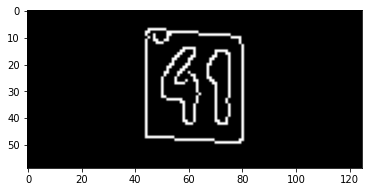

In [357]:
edges=cv2.Canny(bfilter,30,150)
plt.imshow(edges,cmap='gray')

In [358]:
keypoints= cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
countours=imutils.grab_contours(keypoints)
sorted_contours=sorted(countours,key=cv2.contourArea,reverse=True)
len(sorted_contours)

5

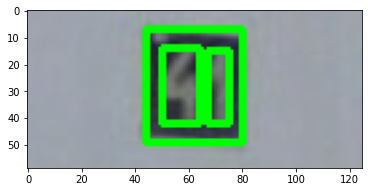

In [359]:
for i  in range(len(sorted_contours)):
    mask=np.zeros(gray.shape,np.uint8)
    new_image=cv2.drawContours(mask,[sorted_contours[i]],-1,255,-1)
    (x,y)=np.where(mask==255)
    (x1,y1)=(np.min(x),np.min(y))
    (x2,y2)=(np.max(x),np.max(y))
    res=cv2.rectangle(img,(y1,x1),(y2,x2),(0,255,0),2)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))